Pearson's correlation Matrix: 
[[1.         0.99660709 0.99739663 ... 0.70898277 0.68625679 0.68483481]
 [0.99660709 1.         0.99833348 ... 0.65755616 0.63763128 0.6368058 ]
 [0.99739663 0.99833348 1.         ... 0.69453831 0.67773676 0.67722497]
 ...
 [0.70898277 0.65755616 0.69453831 ... 1.         0.99570813 0.99446012]
 [0.68625679 0.63763128 0.67773676 ... 0.99570813 1.         0.99991588]
 [0.68483481 0.6368058  0.67722497 ... 0.99446012 0.99991588 1.        ]]
Discretized Form Matrix: 
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


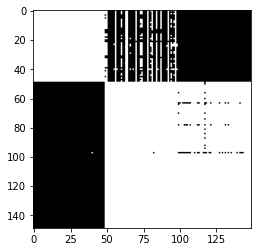

<Figure size 432x288 with 0 Axes>

In [ ]:
import pandas as pd
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import math

def update_columns(r,crr,M):
    cols=crr.shape[0]
    for c in range(cols):
        if(crr[r][c]<M):
            crr[r][c]=0
        else:
            crr[r][c]=1

def Mean(num):
    Sum=0
    for i in num:
        Sum+=i
    return Sum/len(num)


def Pearson(i,j):
    numerator=0
    denominator=0
    x = [var-Mean(i) for var in i] #(X-Mean(X))

    y = [var-Mean(j) for var in j] #(Y-Mean(Y))
    xy = [num_1 * num_2 for num_1, num_2 in list(zip(x,y))]
    numerator = sum(xy)
    X= [((var-Mean(i))**2) for var in i] #(X-Mean(X))^2
    Y= [((var-Mean(j))**2) for var in j] #(Y-Mean(Y))^2
    denominator=math.sqrt(sum(X)*sum(Y))

    return numerator/denominator



df = pd.read_csv("iris.data")
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df=np.array(df.drop(["class"], axis = 1))
matrix=[]
for i in df:
    a =[] 
    for j in df:
        #Calculate Pearson's coefficient 
        P=Pearson(i,j)
        a.append(P)
    matrix.append(a)
crr=pd.DataFrame(matrix)
corr_matrix=np.matrix(crr)
print("Pearson's correlation Matrix: ")  
print(corr_matrix)
cols=0
for i in crr:
    update_columns(cols,crr,Mean(crr[i])) 
    cols+=1
D_matrix=np.matrix(crr).transpose()
print('Discretized Form Matrix: ')  
print(D_matrix)
#Plot bitmap of values
plt.imshow(D_matrix,cmap="gray")
plt.show()
plt.savefig('fig.png')